
# Project: Investigate a Dataset (No-show appointments data set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

In this report, I will invistigate what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.
Especially, I will explore the relationship between the scholarship and no-show. Also, I will look into patient's age and health condition to see if they have effect on no-show. Finally, I will check if receiving SMS-reminders would make patient show-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#load data set
df=pd.read_csv('noshow_app.csv',index_col='PatientId')
#check the first rows
df.head()



,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# check number of rows & columns, if there is null values and columns' data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 2.98724998243e+13 to 3.77511518121e+14
Data columns (total 13 columns):
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


>there are 110527 rows and 13 columns. None of them has null values 

 >there are 2 problems with columns data types
    ScheduledDay  & AppointmentDay are string while they should be date/time 
     


In [3]:
# to show statistics about numerical columns
df.describe()#

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>From statistics above, we can identify 2 problems:
1. age has outliers since the max is 115 and the min is -1. Rows that contain outlires should be removed. 
2. handcap should be 0 or 1, but the max is 4, so 2,3,4 should be replaced with 1.


### Data Cleaning 

In [4]:
# changing ScheduledDay & AppointmentDay to date/time
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# replace Handcap wrong values (2,3,4) with 1
df.Handcap.replace([2, 3,4], [1,1,1], inplace=True)

In [10]:
df.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# delete rows with outliers in Age
df = df[(df.Age >=1)]
df = df[(df.Age <=100)]

In [12]:
df.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069800e+05,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000
mean,5.675433e+06,38.311311,0.101038,0.203776,0.074248,0.031408,0.020901,0.323275
std,7.133332e+04,22.459144,0.301380,0.402807,0.262175,0.174418,0.143054,0.467729
min,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640489e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106980 entries, 2.98724998243e+13 to 3.77511518121e+14
Data columns (total 13 columns):
AppointmentID     106980 non-null int64
Gender            106980 non-null object
ScheduledDay      106980 non-null datetime64[ns]
AppointmentDay    106980 non-null datetime64[ns]
Age               106980 non-null int64
Neighbourhood     106980 non-null object
Scholarship       106980 non-null int64
Hipertension      106980 non-null int64
Diabetes          106980 non-null int64
Alcoholism        106980 non-null int64
Handcap           106980 non-null int64
SMS_received      106980 non-null int64
No-show           106980 non-null object
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.4+ MB


>3547 rows are removed 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (the relationship between the scholarship and no-show)

In [14]:
# create pivot table to compare:
#shwo up and have scholarship 
#did not show up and have scholarship 

noshow_scholarship=pd.pivot_table(df,index=['No-show','Scholarship'],values=['AppointmentID'],aggfunc='count')

In [15]:
print(noshow_scholarship)

                     AppointmentID
No-show Scholarship               
No      0                    77065
        1                     8238
Yes     0                    19106
        1                     2571


[0.7589828634604754, 0.23687119955776673]


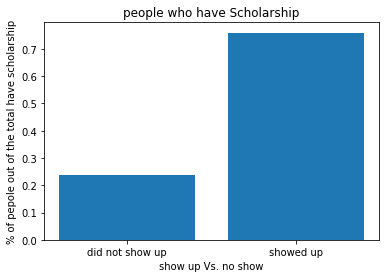

In [16]:
y=[8238/(8283+2571),2571/(8283+2571)]
x=['showed up','did not show up']
plt.bar(x,y)
plt.title('people who have Scholarship')
plt.ylabel('% of pepole out of the total have scholarship')
plt.xlabel('show up Vs. no show')
print(y)

### From the above chart, we can see that out of the total of people who have scholarship,76% showed up and 24% did not show up. This indicates that having scholarship might have encouraged people to attend their appointments.

### Research Question 2  (the relationship between age and no-show)

In [17]:
# define function that takes an age and assigns it to the right age group 
def age_group (x):
    if   x >=1  and x <= 18: return '1-18'
    elif x >=19 and x <= 35: return '19-35'
    elif x >=36 and x <= 65: return '36-65'
    elif x >=66 and x <= 100: return'66-100'
    else: return 'outlier'

In [18]:
# add new column Age_group to the dataframe by applying the function 
df['Age_group']= df['Age'].apply(age_group)

In [19]:
# to check if the column is added correctly 
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_group
PatientId,,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,36-65
5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,36-65
4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,36-65
8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1-18
8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,36-65


In [20]:
# how many patients showed up and how many did not show up from each age group
df.groupby(by=['No-show','Age_group']).count()

AppointmentID  Gender  ScheduledDay  AppointmentDay    Age  \
No-show Age_group                                                               
No      1-18               19619   19619         19619           19619  19619   
        19-35              18384   18384         18384           18384  18384   
        36-65              36069   36069         36069           36069  36069   
        66-100             11231   11231         11231           11231  11231   
Yes     1-18                5708    5708          5708            5708   5708   
        19-35               5753    5753          5753            5753   5753   
        36-65               8153    8153          8153            8153   8153   
        66-100              2063    2063          2063            2063   2063   

                   Neighbourhood  Scholarship  Hipertension  Diabetes  \
No-show Age_group                                                       
No      1-18               19619        19619         19619     19619   
        19-35              18384        18384         18384     18384   
        36-65              36069        36069         36069     36069   
        66-100             11231        11231         11231     11231   
Yes     1-18                5708         5708          5708      5708   
        19-35               5753         5753          5753      5753   
        36-65               8153         8153          8153      8153   
        66-100              2063         2063          2063      2063   

                   Alcoholism  Handcap  SMS_received  
No-show Age_group                                     
No      1-18            19619    19619         19619  
        19-35           18384    18384         18384  
        36-65           36069    36069         36069  
        66-100          11231    11231         11231  
Yes     1-18             5708     5708          5708  
        19-35            5753     5753          5753  
        36-65            8153     8153          8153  
        66-100           2063     2063          2063

Text(0,0.5,'% of people')

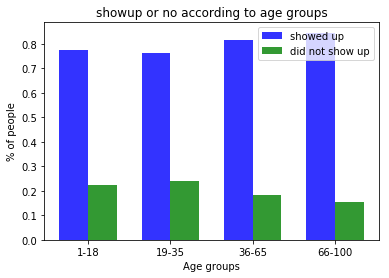

In [21]:
n=4
showup=[19619/(19619+5708),18384/(18384+5753),36069/(36069+8153),11231/(11231+2063)]
no_show=[5708/(19619+5708),5753/(18384+5753),8153/(36069+8153),2063/(11231+2063)]

fig, ax = plt.subplots()
ind = np.arange(n)    # the x locations for the groups
width = 0.35         # the width of the bars
 
x1 = ax.bar(ind, showup, width,
                 alpha=0.8,
                 color='b',
                 label='show up')
 
x2 = ax.bar(ind + width , no_show, width,
                 alpha=0.8,
                 color='g',
                 label='no show')

ax.set_title('showup or no according to age groups')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1-18','19-35','36-65','66-100'))
ax.legend((x1[0], x2[0]), ('showed up', 'did not show up'))
plt.xlabel('Age groups')
plt.ylabel('% of people')

From the bar chart above, comparing the percentage of people who showed up for their appointments according to their age group revels that people from age 36 and above are more likely to show up for their appointments 

### Research Question 3 (the relationship between health condition and no-show)

In [22]:
# create dataframe for patients who have at least one of the 4 health conditions (Hipertension,Diabetes, Alcoholism, Handcap)
health=df[(df['Hipertension'] == 1) | (df['Diabetes'] == 1)| (df['Alcoholism'] == 1) | (df['Handcap'] == 1)]

In [23]:
# create pivot table to compare:
# people who have one or more health condition and showed up 
# people who have one or more health condition and did not show up  
noshow_health=pd.pivot_table(health,index=['No-show'],values=['AppointmentID'],aggfunc='count')

In [24]:
print(noshow_health)

         AppointmentID
No-show               
No               21693
Yes               4713


[0.8215178368552601, 0.17848216314473983]


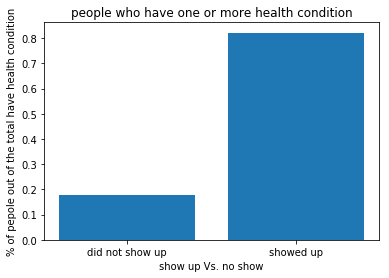

In [25]:
a=[21693/(21693+4713),4713/(21693+4713)]
b=['showed up','did not show up']
plt.bar(b,a)
plt.title('people who have one or more health condition')
plt.ylabel('% of pepole out of the total have health condition')
plt.xlabel('show up Vs. no show')
print (a)

From the chart above, it is clear that out of the total people who have one or more health condition, almost 82% showed up and 18% did not show up. This means if a person has one or more health issues, he/she was more likely to show up for appointment.

### Research Question 4 (the relationship between receiving SMS reminder and show-up)

In [26]:
# create pivot table to compare:
# people who received SMS and showed up 
# people who received SMS and did not show up 
noshow_sms=pd.pivot_table(df,index=['No-show','SMS_received'],values=['AppointmentID'],aggfunc='count')

In [27]:
print(noshow_sms)

                      AppointmentID
No-show SMS_received               
No      0                     60287
        1                     25016
Yes     0                     12109
        1                      9568


Text(0.5,1,'People who received SMS reminders')

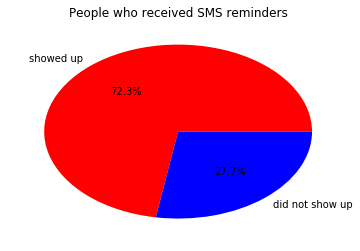

In [28]:
a=[25016/(25016+9568),9568/(25016+9568)]
b=['showed up','did not show up']
colors = ['red', 'blue']
plt.pie(a,labels=b, colors=colors,autopct='%1.1f%%')
plt.title('People who received SMS reminders')


from the chart above, it is clear that out of the total people who received SMS reminders,72.3% showed up and 27.7% did not show up. Therefore, receiving SMS reminder might has increased the likelihood of showing up for appointments 

<a id='conclusions'></a>
## Conclusions
**limitations:** comparison is not fair(biased) because the number of no-show='no' is almost 80% of the total number of rows, which means that te number of rows for patients who showed up for their appointments= 80%. This in turn gives every indpendent variable more importance than it should be.

In [29]:
# comparison is not fair(biased) because the number of no-show='no' is almost 80% of the total number of rows
df.groupby(by='No-show').count()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Age_group
No-show,,,,,,,,,,,,,
No,85303,85303,85303,85303,85303,85303,85303,85303,85303,85303,85303,85303,85303
Yes,21677,21677,21677,21677,21677,21677,21677,21677,21677,21677,21677,21677,21677


**Analysis:** With this biased dataset, I found that:
1. If a person has scholarship, the chance of show-up icreased by 52%  
2. People from age 36 and above were more likely to show up for their appointments
3. If a person has one or more health condition, such as hypertension, alcoholism, handicapped,or diabetes, the chance of show-up icreased by 64%   
4. If a person received SMS reminder, the chance of show-up icreased by 45%

**recommendation:** take equal sample of the data set(no-show='yes' and no-show='no') and perform the analysis again

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0